Importing Libraries

In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Reading excel file

In [209]:
meta_data='rainfall.csv'
df=pd.read_csv(meta_data)

Data Exploration

In [210]:
df.head(10)

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4
5,Paro,2000,6,24.8,15.2,69.0,0.33,43.0
6,Paro,2000,7,23.5,19.7,81.0,0.13,108.5
7,Paro,2000,8,23.6,19.2,76.0,0.51,84.3
8,Paro,2000,9,23.3,16.5,72.0,0.15,74.8
9,Paro,2000,10,22.8,12.0,58.0,0.17,0.0


In [211]:
df.shape

(2639, 8)

In [212]:
df.columns

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed',
       'Rainfall'],
      dtype='object')

In [213]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

In [214]:
df.count()

location      2639
Year          2639
Month         2639
Tmax          2638
Tmin          2638
RH            2637
Wind Speed    2632
Rainfall      2638
dtype: int64

In [215]:
col=['Tmax','Tmin','RH','Wind Speed','Rainfall']
df[col].mean()

Tmax          21.468284
Tmin          10.305516
RH            72.616870
Wind Speed     0.824214
Rainfall      99.919894
dtype: float64

In [216]:

df.rename(columns={'Wind Speed':'WindSpeed'},inplace=True)

Cheking Null values

In [217]:
df.isnull().sum()

location     0
Year         0
Month        0
Tmax         1
Tmin         1
RH           2
WindSpeed    7
Rainfall     1
dtype: int64

In [218]:
df.head(5)

,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [219]:
#df.places.unique()

Handling Missing values

In [220]:
df[['Tmax','Tmin','RH','WindSpeed','Rainfall']]=df[['Tmax','Tmin','RH','WindSpeed','Rainfall']].fillna(df[['Tmax','Tmin','RH','WindSpeed','Rainfall']].mean())

In [221]:
# df.fillna(method='bfill',inplace=True)

df.isnull().sum()

location     0
Year         0
Month        0
Tmax         0
Tmin         0
RH           0
WindSpeed    0
Rainfall     0
dtype: int64

In [222]:
df.isnull().sum()

location     0
Year         0
Month        0
Tmax         0
Tmin         0
RH           0
WindSpeed    0
Rainfall     0
dtype: int64

Label Encoding

In [223]:
# df['location'].describe()

In [224]:
df.rename(columns={'location':'Places'},inplace=True)
df.head()

,Places,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [225]:
df['Places'].value_counts()

Paro            264
Pemagatshel     264
Punakha         264
simkotha        264
Chamkhar        264
Haa             264
Kanglung        264
Mongar          264
Tashiyangtse    264
Deothang        263
Name: Places, dtype: int64

In [226]:
label_encoder = preprocessing.LabelEncoder()
df['Places'] = label_encoder.fit_transform(df['Places'])
print(df.head())

   Places  Year  Month  Tmax  Tmin    RH  WindSpeed  Rainfall
0       5  2000      1   9.5  -0.4  65.0       0.26       0.0
1       5  2000      2  10.6   2.0  65.0       0.52       0.0
2       5  2000      3  14.5   4.0  69.0       0.52      11.0
3       5  2000      4  19.6   8.7  77.0       0.42      23.4
4       5  2000      5  22.5  10.2  77.0       0.24      98.4


In [227]:
df.tail()

,Places,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
2634,8,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,8,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,8,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,8,2021,11,20.050000,6.266667,75.666667,0.328333,9.0
2638,8,2021,12,16.854839,1.935484,74.483871,0.321290,21.0


In [228]:
df.shape
df.Tmax.max()

34.35483871

In [229]:
df.Tmax.min()

7.3

In [230]:
df.Tmax.mean()
df.Rainfall.max()
df.Rainfall.mean()

99.91989385898408

In [231]:
df.Rainfall.max()

2125.9

In [232]:
(df.Rainfall > 2000).count

<bound method Series.count of 0       False
1       False
2       False
3       False
4       False
        ...  
2634    False
2635    False
2636    False
2637    False
2638    False
Name: Rainfall, Length: 2639, dtype: bool>

Visualization

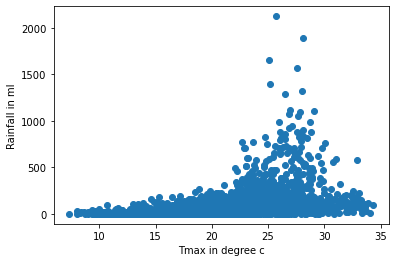

In [233]:
#Tmax Vs. Rainfall
x = df.Tmax
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmax in degree c')
plt.ylabel('Rainfall in ml')
plt.show()

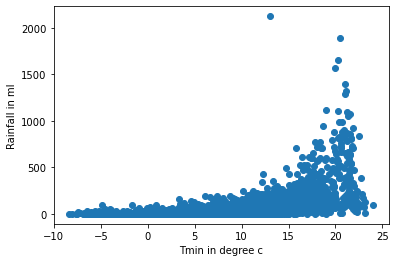

In [234]:
#Tmin Vs. Rainfall
x = df.Tmin
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('Tmin in degree c')
plt.ylabel('Rainfall in ml')
plt.show()

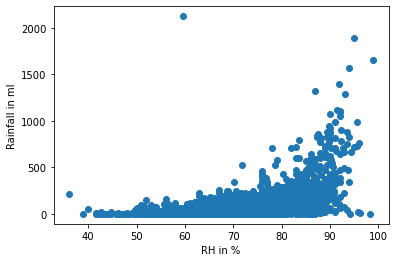

In [235]:
#RH Vs. Rainfall
x = df.RH
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('RH in %')
plt.ylabel('Rainfall in ml')
plt.show()

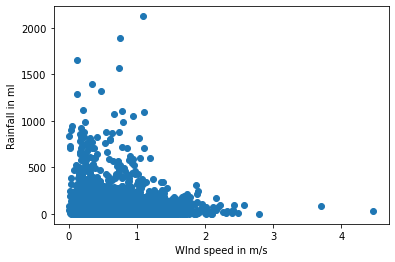

In [236]:
# Wind speed  Vs. Rainfall
x = df.WindSpeed
y = df.Rainfall
plt.scatter(x,y)
plt.xlabel('WInd speed in m/s')
plt.ylabel('Rainfall in ml')
plt.show()

Feature Engineering

In [237]:
#Finding and removing outliers
#sns.boxplot(x=df['Tmax'])
#plt.show()

In [238]:
#Q1 = df.Tmax.quantile(0.25)
#Q3 = df.Tmax.quantile(0.75)
#IQR = Q3 - Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 - (IQR * 1.5)

In [239]:
#df1=df[(df.Tmax> lowerlimit)  & (df.Tmax < upperlimit)]
#df1.shape

In [240]:
#Finding and removing outliers from tmin
#sns.boxplot(x=df1['Tmin'])
#plt.show()


In [241]:
Q1 = df.Tmin.quantile(0.25)
Q3 = df.Tmin.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [242]:
df2=df[(df.Tmin> lowerlimit)  & (df.Tmin < upperlimit)]
df2.shape

(2639, 8)

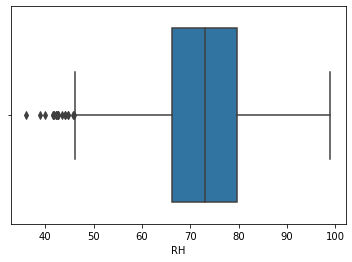

In [243]:
#Finding and removing outliers from rh
sns.boxplot(x=df2['RH'])
plt.show()

In [244]:
Q1 = df2.RH.quantile(0.25)
Q3 = df2.RH.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [245]:
df3=df2[(df2.RH> lowerlimit)  & (df2.RH < upperlimit)]
df3.shape

(2620, 8)

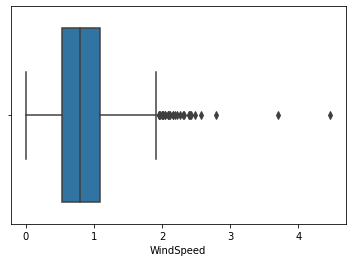

In [246]:
#Finding and removing outliers from Windspeed
sns.boxplot(x=df2['WindSpeed'])
plt.show()


In [247]:
Q1 = df3.WindSpeed.quantile(0.25)
Q3 = df3.WindSpeed.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [248]:
df4=df3[(df3.WindSpeed> lowerlimit)  & (df3.WindSpeed < upperlimit)]
df4.shape

(2590, 8)

In [249]:
df4.corr()

,Places,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
Places,1.000000,-0.007662,0.004582,0.174478,0.049443,-0.065942,-0.151575,-0.167665
Year,-0.007662,1.000000,-0.003955,0.067720,-0.029463,-0.153126,-0.159512,-0.002129
Month,0.004582,-0.003955,1.000000,0.206018,0.196200,0.125817,-0.248115,0.041607
Tmax,0.174478,0.067720,0.206018,1.000000,0.875319,0.356392,-0.255107,0.400836
Tmin,0.049443,-0.029463,0.196200,0.875319,1.000000,0.534107,-0.291984,0.520443
RH,-0.065942,-0.153126,0.125817,0.356392,0.534107,1.000000,-0.314941,0.510174
WindSpeed,-0.151575,-0.159512,-0.248115,-0.255107,-0.291984,-0.314941,1.000000,-0.224137
Rainfall,-0.167665,-0.002129,0.041607,0.400836,0.520443,0.510174,-0.224137,1.000000


<AxesSubplot:>

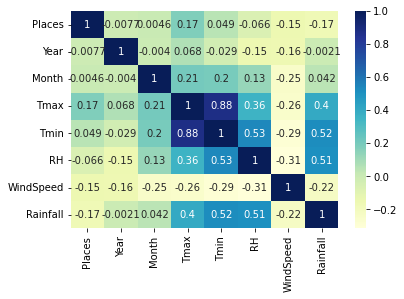

In [250]:
sns.heatmap(df4.corr(), annot=True,cmap='YlGnBu')

In [251]:
#Finding and removing outliers from Rainfall
#sns.boxplot(x=df['Rainfall'])
#plt.show()

In [252]:
#Q1 = df4.Rainfall.quantile(0.25)
#Q3 = df4.Rainfall.quantile(0.75)
#IQR = Q3 - Q1
#upperlimit = Q3 + (IQR * 1.5)
#lowerlimit = Q1 - (IQR * 1.5)

In [253]:
#final_df=df4[(df4.Rainfall> lowerlimit)  & (df4.Rainfall < upperlimit)]
#final_df.shape

In [254]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(df4)
final_df=pd.DataFrame(data=scaled_data,columns=df4.columns)
final_df.head()

,Places,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,0.174976,-1.648847,-1.603338,-2.378979,-1.585022,-0.815043,-1.387232,-0.624846
1,0.174976,-1.648847,-1.312780,-2.160757,-1.232090,-0.815043,-0.727820,-0.624846
2,0.174976,-1.648847,-1.022223,-1.387059,-0.937980,-0.400055,-0.727820,-0.556885
3,0.174976,-1.648847,-0.731666,-0.375301,-0.246822,0.429922,-0.981440,-0.480274
4,0.174976,-1.648847,-0.441109,0.200013,-0.026239,0.429922,-1.437956,-0.016902


In [255]:
X=final_df[['Places','Year','Month','Tmax','RH','WindSpeed']]
y=final_df['Rainfall']


Splitting Data 

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [257]:
len(X_train)

2072

In [258]:
len(X_test)

518

Feature Scaling

Training Model / Modelling

ANN Algorithm

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                350       
                                                                 
 dense_25 (Dense)            (None, 8)                 408       
                                                                 
 dense_26 (Dense)            (None, 32)                288       
                                                                 
 dense_27 (Dense)            (None, 64)                2112      
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 64)               

52/52 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.0000e+00 - val_loss: 0.2155 - val_accuracy: 0.0000e+00
Epoch 45/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.0000e+00 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 46/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.0000e+00 - val_loss: 0.2162 - val_accuracy: 0.0000e+00
Epoch 47/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1773 - accuracy: 0.0000e+00 - val_loss: 0.2316 - val_accuracy: 0.0000e+00
Epoch 48/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.0000e+00 - val_loss: 0.2549 - val_accuracy: 0.0000e+00
Epoch 49/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.0000e+00 - val_loss: 0.2405 - val_accuracy: 0.0000e+00
Epoch 50/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.0000e+00 - val_los

Epoch 99/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1689 - accuracy: 0.0000e+00 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 100/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1459 - accuracy: 0.0000e+00 - val_loss: 0.2453 - val_accuracy: 0.0000e+00


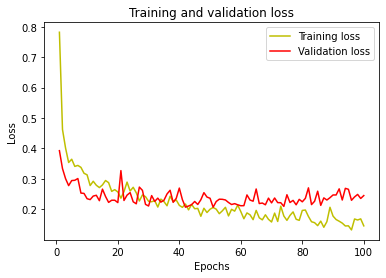

In [259]:

#Experiment with deeper and wider networks
model_ann = Sequential()
#Input layer
model_ann.add(Dense(50, input_dim=6, activation='relu'))
model_ann.add(Dense(8, activation='relu'))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(64, activation='relu'))
#

model_ann.add(Dense(64, activation='relu'))

model_ann.add(Dropout(0.10))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.1))
model_ann.add(Dense(128, activation='relu'))

#Output layerr
model_ann.add(Dense(1, activation='linear'))

model_ann.compile(optimizer='adam',loss='mean_squared_error',  metrics=['accuracy'])
model_ann.summary()

history = model_ann.fit(X_train, y_train, validation_split=0.2, epochs =100)

from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [260]:
Y_train_predicted = model_ann.predict(X_train)
Y_test_predicted = model_ann.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))

17/17 [==============================] - 0s 699us/step
Train set accuracy:  0.8455446212655199
Test set accuracy :  0.5471863824802212


In [261]:
# Result = pd.DataFrame({'actaul':y_test,'predicted':Y_test_predicted})
# Result.head(29)

Linear regression algorithm

In [262]:
model_LR = LinearRegression()
model_LR

LinearRegression()

In [263]:
model_LR.fit(X_train,y_train)
#prediction
y_pred=model_LR.predict(X_test)


In [264]:
#Accuracy
Y_train_predicted = model_LR.predict(X_train)
Y_test_predicted = model_LR.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))
print("mse:",mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))    

Train set accuracy:  0.3874829403746104
Test set accuracy :  0.28630188213889807
mse: 0.9227267754331077
root_mean_squared error of is== 0.9605866829355421


KNN Algorithms

In [265]:
from sklearn.neighbors import KNeighborsRegressor

In [266]:
model_KNNR=KNeighborsRegressor(10)
model_KNNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [267]:
K_pred=model_KNNR.predict(X_test)


In [268]:
#Accuracy
Y_train_predicted = model_KNNR.predict(X_train)
Y_test_predicted = model_KNNR.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))
print("mse:",mean_squared_error(y_test,Y_test_predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,Y_test_predicted))) 

Train set accuracy:  0.759102750806988
Test set accuracy :  0.5771310865466496
mse: 0.54671920687011
root_mean_squared error of is== 0.73940463000316


In [269]:
print()
Result = pd.DataFrame({'actaul':y_test,'predicted':K_pred})
Result.head(20)

,actaul,predicted
2401,-0.291836,-0.585243
812,0.945058,0.188304
2528,-0.621757,-0.489850
443,-0.486452,-0.575914
1857,-0.357326,0.192604
1397,1.772950,2.648599
1328,-0.336320,0.373443
745,-0.114519,-0.115940
1246,-0.624846,-0.598712
215,-0.612489,-0.528526


Decision Tree

In [270]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(max_depth=5)
model_decision.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [271]:
X_test

,Places,Year,Month,Tmax,RH,WindSpeed
2401,1.221600,-0.704983,-1.022223,-0.811746,-1.216645,-1.224425
812,1.570474,-1.334225,0.140006,0.854680,0.429922,-0.347389
2528,1.221600,0.868124,1.302235,-0.054580,-1.537815,-0.688086
443,0.523851,0.710814,-1.603338,-0.990291,-0.236067,-0.582193
1857,-0.522773,-1.176915,0.721121,0.636457,0.844911,-0.068407
...,...,...,...,...,...,...
2294,-0.173898,1.340056,-1.022223,-0.247951,-0.620936,0.698181
125,0.174976,-0.075740,0.140006,0.631498,1.668194,-0.500380
1418,-1.220522,-0.075740,-0.150551,0.639764,2.193623,-1.483045
2193,-0.173898,-0.075740,1.011678,0.065624,0.423229,-0.696731


In [272]:
K_pred=model_decision.predict(X_test)
K_pred


array([-0.53316699,  0.1357546 , -0.60851578, -0.53316699,  0.1357546 ,
        1.69289661,  0.50895205,  0.1357546 , -0.60206994, -0.53316699,
        0.67208067, -0.60311344, -0.53316699,  2.62708237,  0.18653444,
       -0.53316699, -0.09534169, -0.23094792, -0.09534169,  0.67208067,
       -0.57619798,  0.67208067, -0.60311344,  1.87491955, -0.09534169,
       -0.45997415, -0.09534169, -0.45997415,  0.1357546 , -0.42487334,
       -0.42487334,  0.03051657,  0.50895205,  0.1357546 , -0.53316699,
        0.1357546 , -0.3221095 , -0.23094792, -0.09534169, -0.09534169,
       -0.09534169,  0.67208067,  3.77182157,  0.67208067, -0.09534169,
       -0.60851578, -0.45997415, -0.42487334,  0.33130676, -0.55986726,
        0.50895205, -0.60851578,  0.67208067, -0.09534169,  0.1357546 ,
       -0.60311344, -0.45997415,  0.1357546 , -0.45997415, -0.09534169,
        0.67208067, -0.09534169,  0.67208067,  0.11835758, -0.27785046,
       -0.23094792,  0.11835758, -0.57619798,  2.62708237, -0.60

In [273]:
y_test

2401   -0.291836
812     0.945058
2528   -0.621757
443    -0.486452
1857   -0.357326
          ...   
2294   -0.412313
125     0.030053
1418    4.482749
2193   -0.301721
2033    0.046735
Name: Rainfall, Length: 518, dtype: float64

In [274]:
#Accuracy
Y_train_predicted = model_decision.predict(X_train)
Y_test_predicted = model_decision.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))
print("mse:",mean_squared_error(y_test,Y_test_predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,Y_test_predicted))) 

Train set accuracy:  0.7525854050656173
Test set accuracy :  0.4978647085983986
mse: 0.6492012052024723
root_mean_squared error of is== 0.8057302310342291


Gradient Boosting Algorithm

In [275]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_params = {'n_estimators': 10,'max_depth':4,'min_samples_split': 5,
          'learning_rate': 0.1,'loss': 'ls'}
model_gradient = GradientBoostingRegressor(**gbr_params)
model_gradient.fit(X_train, y_train)

GradientBoostingRegressor(loss='ls', max_depth=4, min_samples_split=5,
                          n_estimators=10)

In [276]:
g_pred=model_gradient.predict(X_test)

In [277]:
#Accuracy
Y_train_predicted = model_gradient.predict(X_train)
Y_test_predicted = model_gradient.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))
print("mse:",mean_squared_error(y_test,Y_test_predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,Y_test_predicted))) 

Train set accuracy:  0.659445578311141
Test set accuracy :  0.4618253823075259
mse: 0.6957957673919029
root_mean_squared error of is== 0.8341437330531848


Random forest

In [278]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=10)
model_random.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [279]:
r_pred = model_random.predict(X_train)
r_pred

array([ 0.44270138, -0.45858799, -0.30833191, ..., -0.07559561,
        0.13304534, -0.36894096])

In [280]:
#Accuracy
Y_train_predicted = model_random.predict(X_train)
Y_test_predicted = model_random.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,Y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,Y_test_predicted))
print("mse:",mean_squared_error(y_test,Y_test_predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,Y_test_predicted))) 

Train set accuracy:  0.954179393474781
Test set accuracy :  0.5273562244147367
mse: 0.611072183126026
root_mean_squared error of is== 0.7817110611511302
